In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#import the libaries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense , LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#import the libaries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense , LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Get the stock quote
# Use yfinance instead of pandas_datareader as it is more actively maintained
!pip install yfinance
import yfinance as yf

Df = yf.download('AAPL', start='2012-01-01',end='2019-12-17')
Df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416984,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483712,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622303,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754256,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734027,394024400
...,...,...,...,...,...,...
2019-12-10,67.150002,67.517502,66.464996,67.120003,65.218658,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,65.774940,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,65.942566,137310400


In [ ]:
Df.shape


(3123, 6)

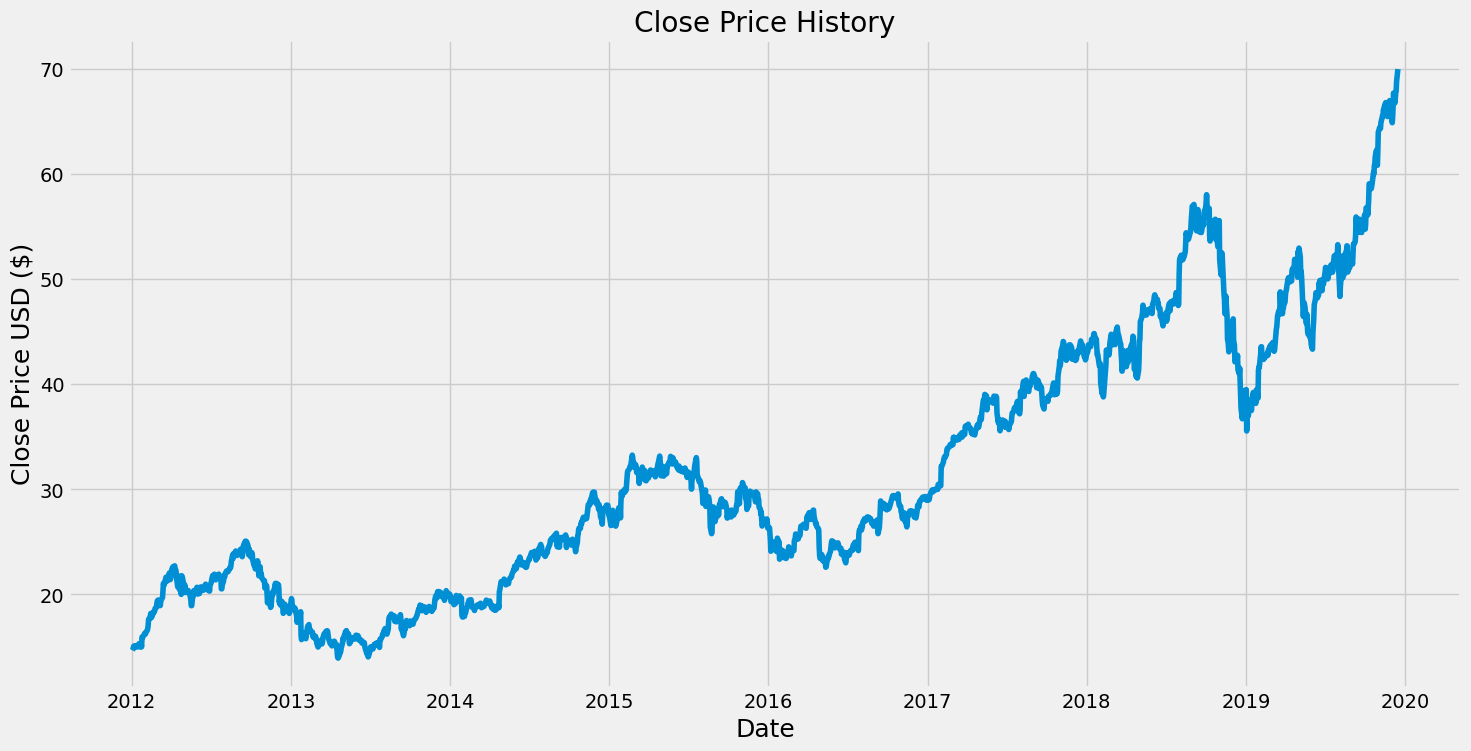

In [ ]:
plt.figure= plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(Df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the Close column
data = Df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len



1602

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0131974 ],
       [0.01460639],
       [0.01753278],
       ...,
       [0.96251174],
       [0.97897982],
       [1.        ]])

In [ ]:
#create the trainning data set
# Assuming 'scaled_data' is defined in a previous cell, execute that cell first
try:
    train_data = scaled_data[0:training_data_len , :]
except NameError:
    print("The variable 'scaled_data' is not defined. Make sure to run the cell where it is created before this one.")
#Split data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61: #Fixed indentation here to match the loop
        print(x_train)
        print(y_train)
        print()

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.01898002, 0.02351306, 0.01905016,
       0.03578601, 0.03449178, 0.0361813 , 0.03983449, 0.0420468 ,
       0.04186191, 0.04117973, 0.04408699, 0.04682209, 0.04992063,
       0.05492545, 0.06543874, 0.06559812, 0.0714509 , 0.07582451,
       0.06830775, 0.07120224, 0.07114487, 0.07926096, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.0923691 , 0.0968511 ,
       0.09814534, 0.09859802, 0.09093461, 0.08908567, 0.08935984,
       0.09656423, 0.09859166, 0.10294617, 0.1132108 , 0.12690551,
       0.12434252, 0.12434889, 0.13425015, 0.13734869, 0.13514271,
       0.13312806, 0.13103049, 0.13799896, 0.14278065, 0.14478257])]
[0.139835129205152]

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.0189

In [ ]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1542, 60, 1)

In [ ]:
 #bulit the LSTM model
 model = Sequential()
 model.add(LSTM(50,return_sequences=True,  input_shape= (x_train.shape[1],1)))
 model.add(LSTM(50,return_sequences=False))
 model.add(Dense(25))
 model.add(Dense(1))
 #compile the model
 model.compile(optimizer='adam',loss='mean_squared_error')
 #train the model
 model.fit(x_train,y_train,batch_size=1,epochs=1)



1542/1542 [==============================] - 48s 29ms/step - loss: 8.8225e-04


In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)


1542/1542 [==============================] - 49s 29ms/step - loss: 3.2855e-04


In [ ]:
#Create the testing data set
#create  a new array containing scaled vales from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
#convert the data  to a numpy array
x_test = np.array(x_test)


In [ ]:
#reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [ ]:
# Make predictions using the model
predictions = model.predict(x_test)  # Use 'predict' instead of 'predicts'
predictions = scaler.inverse_transform(predictions)


13/13 [==============================] - 1s 16ms/step


In [ ]:
#plot the data
# Assuming 'df' is the DataFrame containing the entire dataset
train = Df[:training_data_len]
valid = Df[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price USD ($)',fontsize=15)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

NameError: name 'Df' is not defined

In [ ]:
train = data[:training_data_len]
valid = data[:training_data_len:]
valid['Predictions'] = predictions
#visualization the data
plt.figure(figsize=(16,8))
plt.title(('Model'))
plt.xlabel('Date',fontsize=18)
plt.ytable('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close',Predictions]])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

NameError: name 'data' is not defined

In [ ]:
#import the libaries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense , LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# %%
#import the libaries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense , LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Get the stock quote
# Use yfinance instead of pandas_datareader as it is more actively maintained
!pip install yfinance
import yfinance as yf

Df = yf.download('AAPL', start='2012-01-01',end='2019-12-17')
Df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.388999,12.427260,12.321817,12.333868,302220800
2012-01-04,12.455578,12.492936,12.330251,12.351942,260022000
2012-01-05,12.593855,12.609520,12.432375,12.501065,271269600
2012-01-06,12.725510,12.736054,12.629707,12.646277,318292800
2012-01-09,12.705323,12.886686,12.693875,12.818901,394024400
...,...,...,...,...,...
2019-12-10,65.071671,65.457039,64.436653,65.100754,90420400
2019-12-11,65.626694,65.706680,65.076515,65.151649,78756800


In [ ]:
#Get the quote
apple_quote = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')
#Create the new data frame
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price value and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 to 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append tech past days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)























AttributeError: 'NoneType' object has no attribute 'group'